# Time Series

A time series is a simple line that comes in useful to show how data is changing. In this visualization, there is just one color that is presented on the graph.

In time series, it is more readable to replace the legend with text at the end of the time series because the text is immediately at the end of the line. Readers do not havve to look at the legend and back at the line to understand what they are seeing. However, this text has to be very short.

> In all graphs, it might make sense to add a subtitle underneath the title. This is shown in the first time series, but not in the others. In formal writing, the subtitle should be removed and shown instead as a caption.

In [3]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms import centrality
from networkx.algorithms.community.centrality import girvan_newman

from operator import itemgetter

import numpy as np
import os
import pandas as pd
import sys

In [4]:
line = np.linspace(0.4, 0.5, num=10) + np.random.normal(0, 0.03, 10)

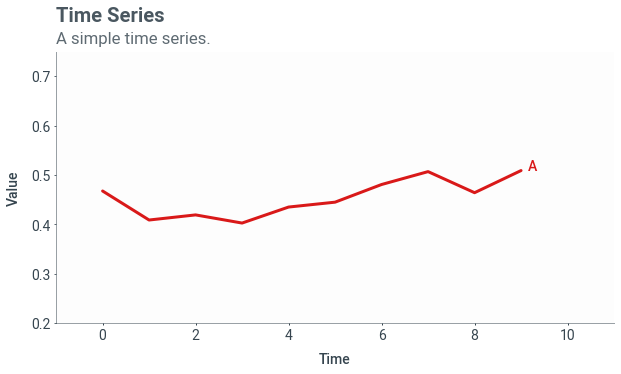

In [13]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,5))

plt.xlim(-1, 11)
plt.ylim(0.2, 0.75)
plt.xlabel('Time')
plt.ylabel('Value')

"""
Instead of adding a legend, add a text at the end of the time series.
"""
plt.plot(range(10), line, label='Time Series')
plt.text(9 + 0.15, line[-1], 'A', color='C0', fontweight=600)
# plt.legend()

plt.title('Time Series', loc='left', fontweight='bold', alpha=0.9,
          pad=30) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.02, 'A simple time series.',
         fontsize='large', alpha=0.8,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()

## Multiple Time Series

Contrary to a normal time series, the multiple time series includes multiple distinct lines to contrast them for some effect. Three colors are provided natively. 

In [9]:
multi_line_1 = np.linspace(0.2, 0.4, num=10) + np.random.normal(0, 0.03, 10)
multi_line_2 = np.linspace(0.4, 0.6, num=10) + np.random.normal(0, 0.03, 10)
multi_line_3 = np.linspace(0.6, 0.8, num=10) + np.random.normal(0, 0.03, 10)

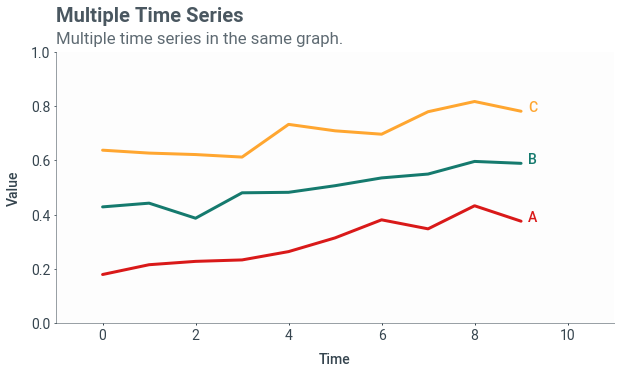

In [15]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,5))

plt.xlim(-1, 11)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(range(10), multi_line_1, label='Time Series Line 1')
plt.text(9 + 0.15, multi_line_1[-1], 'A', color='C0', fontweight=600)

plt.plot(range(10), multi_line_2, label='Time Series Line 2')
plt.text(9 + 0.15, multi_line_2[-1], 'B', color='C1', fontweight=600)

plt.plot(range(10), multi_line_3, label='Time Series Line 3')
plt.text(9 + 0.15, multi_line_3[-1], 'C', color='C2', fontweight=600)

# plt.legend()

plt.title('Multiple Time Series', loc='left', fontweight='bold', alpha=0.9,
          pad=30) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.02, 'Multiple time series in the same graph.',
         fontsize='large', alpha=0.8,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()

### Comparison Time Series

The multiple time series should be used only when different results over the same timespans are being used. A comparison time series can be used to highlight one time series over others.

For example, two time series could show the tweet volume over time. The first, muted time series shows the base corpus. The second, highlighted time series shows a boosted corpus. In this timeseries, one time series is highlighted, whereas the other are muted. Different alpha values can be used if the muted time series need to be differentiated.

It is important that the legend or label at the end of the time series has the exact same style as the accompanying time series. This includes both the color and alpha. The font weight should also be similar to the time series when possible.

In [16]:
multi_comparison_line_1 = np.linspace(0.2, 0.4, num=10) + np.random.normal(0, 0.03, 10)
multi_comparison_line_2 = np.linspace(0.4, 0.6, num=10) + np.random.normal(0, 0.03, 10)
multi_comparison_line_3 = np.linspace(0.6, 0.8, num=10) + np.random.normal(0, 0.03, 10)

cross_comparison_line_1 = np.linspace(0.2, 0.4, num=10) + np.random.normal(0, 0.03, 10)
cross_comparison_line_2 = np.linspace(0.4, 0.6, num=10) + np.random.normal(0, 0.03, 10)
cross_comparison_line_3 = np.linspace(0.6, 0.4, num=10) + np.random.normal(0, 0.03, 10)

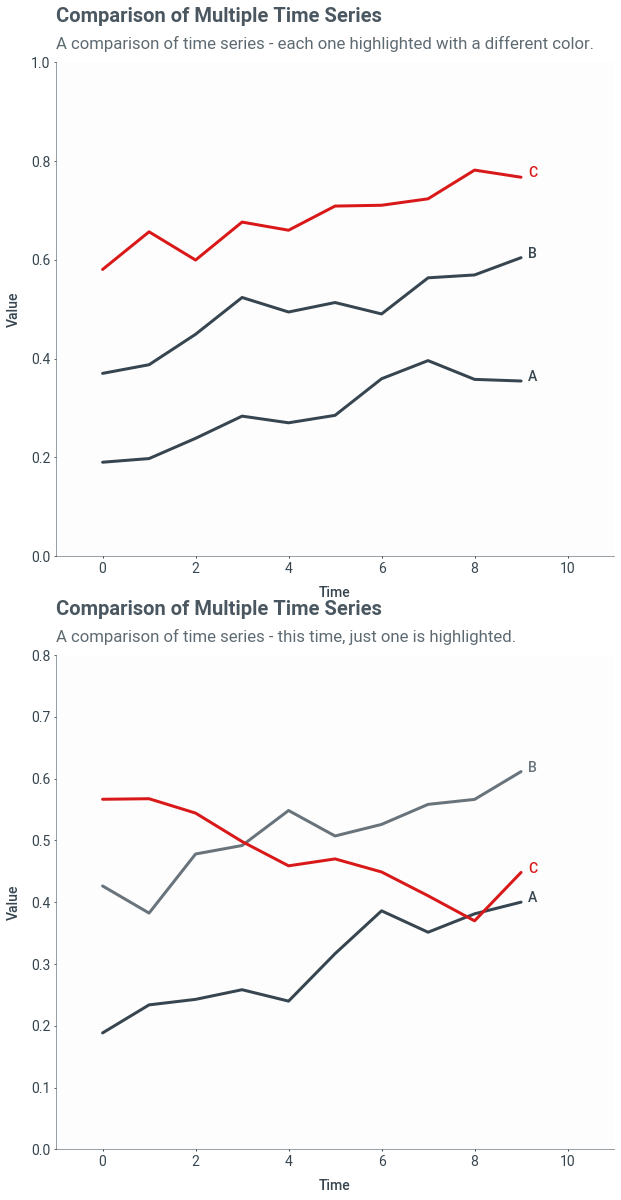

In [32]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))

"""
Demonstration of time series that stack over each other.
"""

ax1.set_xlim(-1, 11)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')

ax1.plot(range(10), multi_comparison_line_1, color='C3', label='Muted Time Series 1')
ax1.text(9 + 0.15, multi_comparison_line_1[-1], 'A', color='C3', fontweight=600)

ax1.plot(range(10), multi_comparison_line_2, color='C3', label='Muted Time Series 2')
ax1.text(9 + 0.15, multi_comparison_line_2[-1], 'B', color='C3', fontweight=600)

ax1.plot(range(10), multi_comparison_line_3, label='Highlighted Time Series')
ax1.text(9 + 0.15, multi_comparison_line_3[-1], 'C', color='C0', fontweight=600)

# ax1.legend()
ax1.set_title('Comparison of Multiple Time Series', loc='left', fontweight='bold', alpha=0.9,
          pad=40) # pad to make space for a subtitle
ax1.text(0, 1.02, 'A comparison of time series - each one highlighted with a different color.',
         fontsize='large', alpha=0.8,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax1.transAxes)

"""
Demonstration of time series that cross each other.
"""

ax2.set_xlim(-1, 11)
ax2.set_ylim(0, 0.8)
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')

ax2.plot(range(10), cross_comparison_line_1, color='C3', label='Muted Time Series 1')
ax2.text(9 + 0.15, cross_comparison_line_1[-1], 'A', color='C3', fontweight=600)

ax2.plot(range(10), cross_comparison_line_2, color='C3', alpha = 0.75, label='Muted Time Series 2')
ax2.text(9 + 0.15, cross_comparison_line_2[-1], 'B', color='C3', alpha=0.75, fontweight=600)

ax2.plot(range(10), cross_comparison_line_3, label='Highlighted Time Series')
ax2.text(9 + 0.15, cross_comparison_line_3[-1], 'C', color='C0', fontweight=600)

# ax2.legend()
ax2.set_title('Comparison of Multiple Time Series', loc='left', fontweight='bold', alpha=0.9,
          pad=40) # pad to make space for a subtitle
ax2.text(0, 1.02, 'A comparison of time series - this time, just one is highlighted.',
         fontsize='large', alpha=0.8,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax2.transAxes)

plt.show()